# Plot curvilinear-grid model output

In [1]:
%pylab inline
import netCDF4
import xarray
from netCDF4 import Dataset

Populating the interactive namespace from numpy and matplotlib


### Reading in data through netCDF4 and xarray

In [2]:
ncf = Dataset('../example_1degree_data/ocean.0001-0010.ssh.nc', "r", format="NetCDF4")
xdata = xarray.open_dataset('../example_1degree_data/ocean.0001-0010.ssh.nc')

ncf_grid = Dataset('../example_1degree_data/ocean.static.nc', 'r', format="NetCDF4")
xdata_grid = xarray.open_dataset('../example_1degree_data/ocean.static.nc')

/Users/Esther/miniconda2/envs/xarrays/lib/python3.6/site-packages/xarray/conventions.py:416: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/Users/Esther/miniconda2/envs/xarrays/lib/python3.6/site-packages/xarray/conventions.py:435: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


In [4]:
ncf_grid.variables;

Loading in the original dataset as a reference.

In [10]:
ncf_old = Dataset('example_data/WOA13_annual_SST_nc3_classic.nc', "r", format="NetCDF4");

In [11]:
ncf_old;

In [12]:
xdata.variables;

In [13]:
ncf;

Reassigning variables

In [14]:
xh = ncf.variables['xh']
yh = ncf.variables['yh']
ssh = ncf.variables['ssh']

In [15]:
ncf_old.variables['tos'];

In [16]:
ssh

<class 'netCDF4._netCDF4.Variable'>
float32 ssh(time, yh, xh)
    long_name: Sea Surface Height
    units: m
    missing_value: -1e+34
    _FillValue: -1e+34
    cell_measures: area: area_t
    cell_methods: area:mean yh:mean xh:mean time: mean
    time_avg_info: average_T1,average_T2,average_DT
unlimited dimensions: time
current shape = (10, 320, 360)
filling off

In [17]:
ssh[1].shape

(320, 360)

### Clearly from netCDF4, this is messed up.

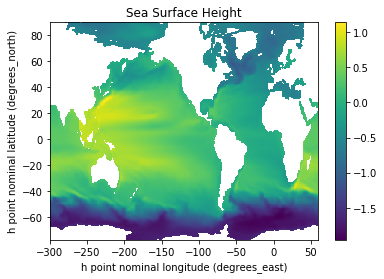

In [18]:
plt.pcolormesh(xh[:], yh[:], ssh[1] ) # picked an arbitrary time for ssh
plt.colorbar();
plt.title(ssh.long_name);
plt.xlabel('%s (%s)' %(xh.long_name, xh.units));
plt.ylabel('%s (%s)' %(yh.long_name, yh.units));

### Now, we plot with xarray

In [19]:
x = xdata['xh']
y = xdata['yh']
xssh = xdata['ssh']

In [20]:
xssh

<xarray.DataArray 'ssh' (time: 10, yh: 320, xh: 360)>
[1152000 values with dtype=float64]
Coordinates:
  * time     (time) object    1-07-02 12:00:00    2-07-02 12:00:00 ...
  * xh       (xh) float64 -299.5 -298.5 -297.5 -296.5 -295.5 -294.5 -293.5 ...
  * yh       (yh) float64 -77.77 -77.56 -77.34 -77.12 -76.9 -76.67 -76.44 ...
Attributes:
    long_name:      Sea Surface Height
    units:          m
    cell_measures:  area: area_t
    cell_methods:   area:mean yh:mean xh:mean time: mean
    time_avg_info:  average_T1,average_T2,average_DT

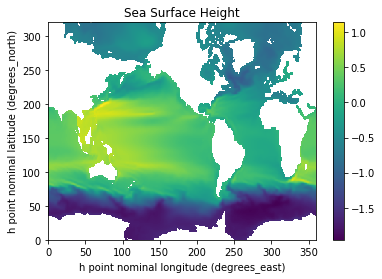

In [17]:
plt.pcolormesh( xssh[1] )
plt.colorbar();

plt.title(xssh.long_name);
plt.xlabel('%s (%s)' %(x.long_name, x.units));
plt.ylabel('%s (%s)' %(y.long_name, y.units));

### Loading in multiple datasets

In [22]:
datasets = ['../example_1degree_data/ocean.0001-0010.ssh.nc', '../example_1degree_data/ocean.static.nc']

This requires `dask` so I conda installed it.

In [23]:
grid_combined = xarray.open_mfdataset(datasets)

/Users/Esther/miniconda2/envs/xarrays/lib/python3.6/site-packages/xarray/conventions.py:416: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/Users/Esther/miniconda2/envs/xarrays/lib/python3.6/site-packages/xarray/conventions.py:435: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


In [24]:
grid_combined

<xarray.Dataset>
Dimensions:       (nv: 2, time: 10, xh: 360, xq: 360, yh: 320, yq: 320)
Coordinates:
  * nv            (nv) float64 1.0 2.0
  * time          (time) object    1-07-02 12:00:00    2-07-02 12:00:00 ...
  * xh            (xh) float64 -299.5 -298.5 -297.5 -296.5 -295.5 -294.5 ...
  * yh            (yh) float64 -77.77 -77.56 -77.34 -77.12 -76.9 -76.67 ...
  * xq            (xq) float64 -299.0 -298.0 -297.0 -296.0 -295.0 -294.0 ...
  * yq            (yq) float64 -77.67 -77.45 -77.23 -77.01 -76.78 -76.55 ...
Data variables:
    ssh           (time, yh, xh) float64 dask.array<shape=(10, 320, 360), chunksize=(10, 320, 360)>
    time_bnds     (time, nv) timedelta64[ns] dask.array<shape=(10, 2), chunksize=(10, 2)>
    average_T1    (time) object dask.array<shape=(10,), chunksize=(10,)>
    average_T2    (time) object dask.array<shape=(10,), chunksize=(10,)>
    average_DT    (time) timedelta64[ns] dask.array<shape=(10,), chunksize=(10,)>
    Coriolis      (yq, xq) float64 dask.ar

## Attempts to plot with xarray

_Pretty sure either there is some sort of manipulation that has to go on with xarray or something with how we past parameters to pcolormesh? Looked through other Github repositories (https://github.com/spencerahill/aospy/issues) and comments that other people had but still couldn't quite figure out how to correctly plot the corners_

Below are just attempts to plot different parameters along with `ssh`.


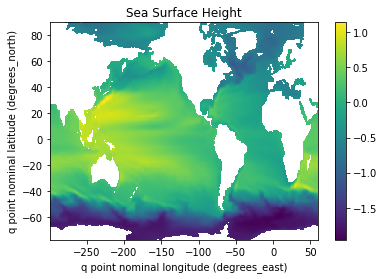

In [25]:
plot('xq', 'yq')

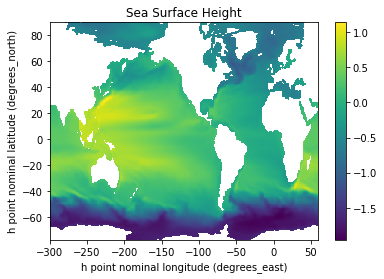

In [26]:
plot('xh', 'yh')

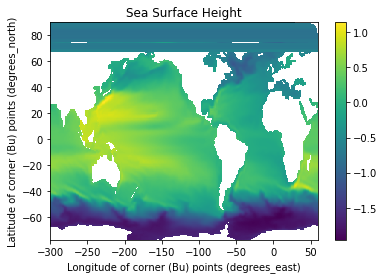

In [27]:
plot('geolon_c', 'geolat_c')

In [28]:
lonc = grid_combined['geolon_c']
latc = grid_combined['geolat_c']
gssh = grid_combined['ssh']

In [29]:
grid_combined.coords

Coordinates:
  * nv       (nv) float64 1.0 2.0
  * time     (time) object    1-07-02 12:00:00    2-07-02 12:00:00 ...
  * xh       (xh) float64 -299.5 -298.5 -297.5 -296.5 -295.5 -294.5 -293.5 ...
  * yh       (yh) float64 -77.77 -77.56 -77.34 -77.12 -76.9 -76.67 -76.44 ...
  * xq       (xq) float64 -299.0 -298.0 -297.0 -296.0 -295.0 -294.0 -293.0 ...
  * yq       (yq) float64 -77.67 -77.45 -77.23 -77.01 -76.78 -76.55 -76.32 ...

In [30]:
grid_combined['wet']

<xarray.DataArray 'wet' (yh: 320, xh: 360)>
dask.array<shape=(320, 360), dtype=float64, chunksize=(320, 360)>
Coordinates:
  * xh       (xh) float64 -299.5 -298.5 -297.5 -296.5 -295.5 -294.5 -293.5 ...
  * yh       (yh) float64 -77.77 -77.56 -77.34 -77.12 -76.9 -76.67 -76.44 ...
Attributes:
    long_name:      0 if land, 1 if ocean at tracer points
    units:          none
    cell_methods:   time: point
    cell_measures:  area: area_t

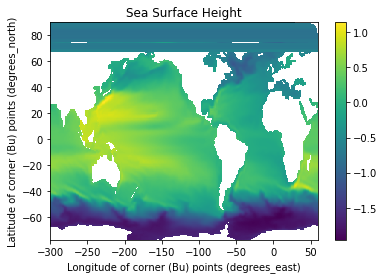

In [31]:
plt.pcolormesh( lonc, latc, grid_combined['ssh'][1] );
plt.colorbar();

plt.title(xssh.long_name);
plt.xlabel('%s (%s)' %(lonc.long_name, lonc.units));
plt.ylabel('%s (%s)' %(latc.long_name, latc.units));

### Function to plot for given parameters

In [21]:
def plot(first, second):
    plt.pcolormesh( grid_combined[first], grid_combined[second], grid_combined['ssh'][1] );
    plt.colorbar();

    plt.title(xssh.long_name);
    plt.xlabel('%s (%s)' %(grid_combined[first].long_name, grid_combined[first].units));
    plt.ylabel('%s (%s)' %(grid_combined[second].long_name, grid_combined[second].units));